In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

sns.set(style="whitegrid")


LEVEL 3 – TASK 1

Q1️. Identify Positive & Negative Keywords

In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dataset .csv']))
print(df.columns)
df = df.dropna(subset=['Rating text'])
df['Rating text'] = df['Rating text'].astype(str)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Rating text'].apply(get_sentiment)

df['Sentiment_Label'] = df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

In [10]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)

positive_reviews = df[df['Sentiment_Label'] == 'Positive']['Rating text']
negative_reviews = df[df['Sentiment_Label'] == 'Negative']['Rating text']

pos_matrix = vectorizer.fit_transform(positive_reviews)
pos_words = vectorizer.get_feature_names_out()

neg_matrix = vectorizer.fit_transform(negative_reviews)
neg_words = vectorizer.get_feature_names_out()

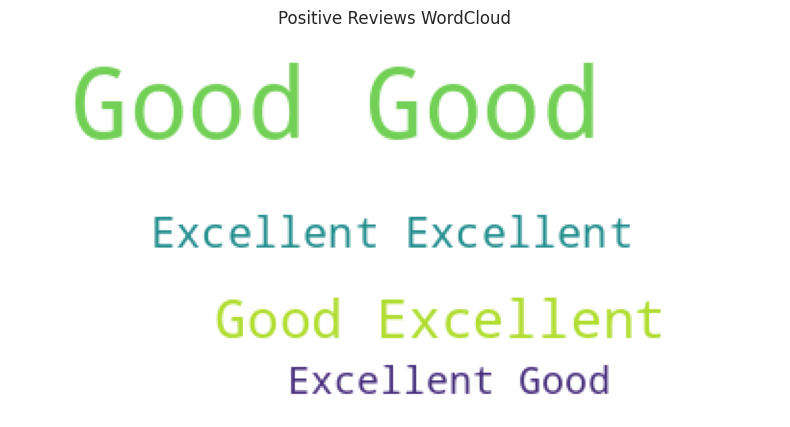

In [11]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color='white').generate(" ".join(positive_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()


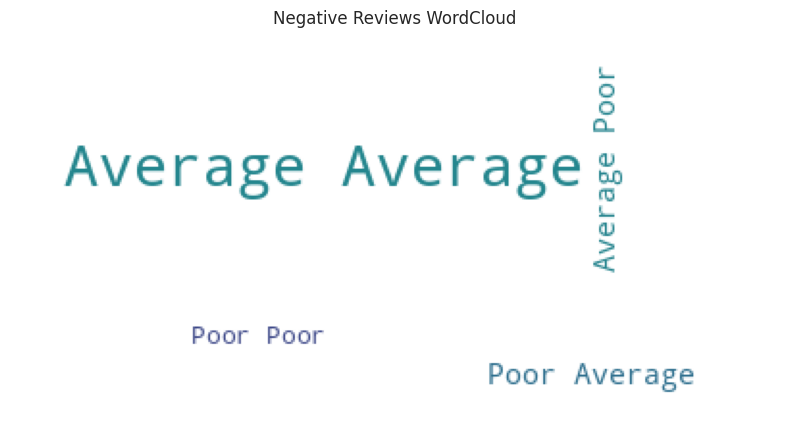

In [14]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color='white').generate(" ".join(negative_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

In [16]:
df['Review_Length'] = df['Rating text'].apply(lambda x: len(x.split()))

avg_length = df['Review_Length'].mean()
print("Average Review Length:", avg_length)

Average Review Length: 1.3378703800649148


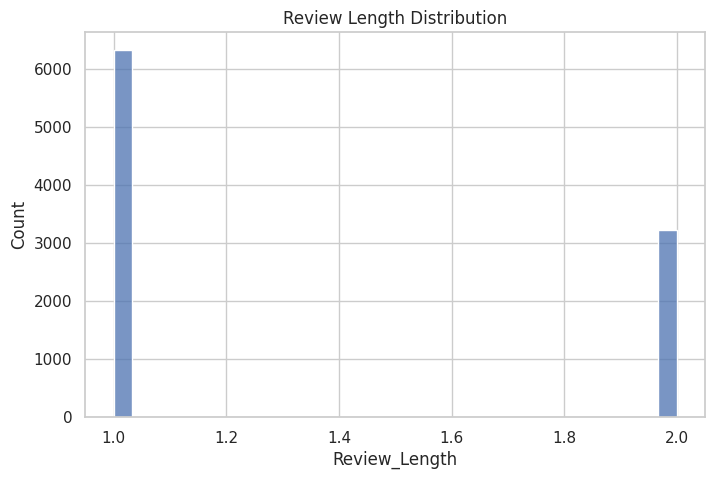

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Review_Length'], bins=30)
plt.title("Review Length Distribution")
plt.show()


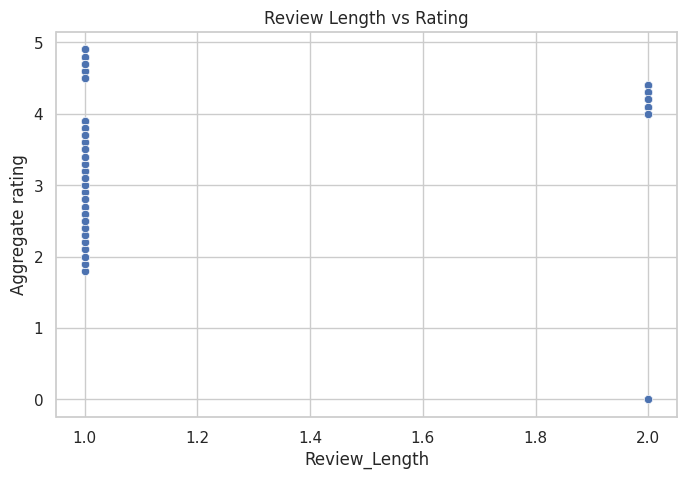

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Review_Length', y='Aggregate rating', data=df)
plt.title("Review Length vs Rating")
plt.show()

In [21]:
df[['Review_Length','Aggregate rating']].corr()

,Review_Length,Aggregate rating
Review_Length,1.000000,-0.599573
Aggregate rating,-0.599573,1.000000


TASK 2 Votes Analysis

In [22]:
highest_votes = df.loc[df['Votes'].idxmax()]
lowest_votes = df.loc[df['Votes'].idxmin()]

print("Highest Votes Restaurant:")
print(highest_votes[['Restaurant Name','Votes']])

print("\nLowest Votes Restaurant:")
print(lowest_votes[['Restaurant Name','Votes']])


Highest Votes Restaurant:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Lowest Votes Restaurant:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


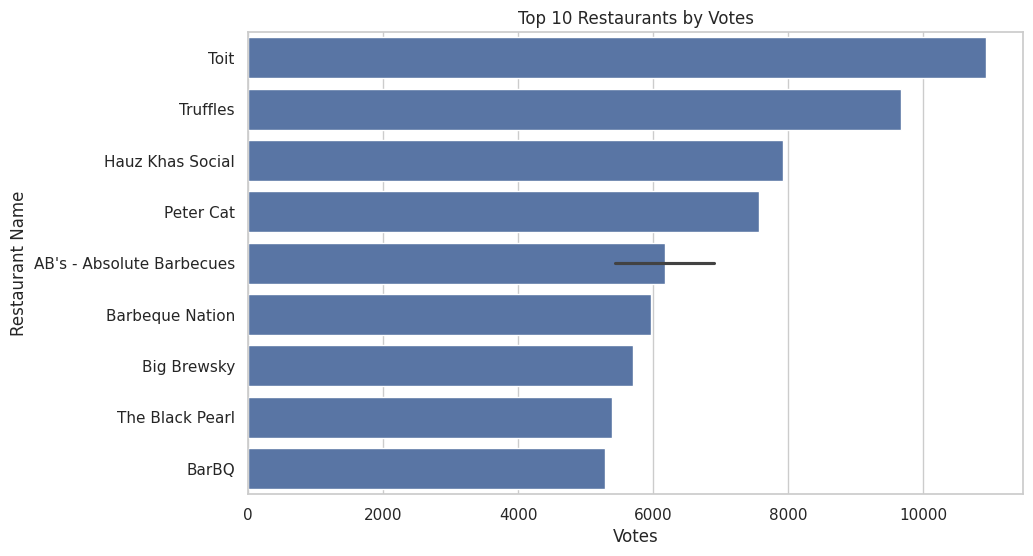

In [23]:
top10 = df.sort_values(by='Votes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Votes', y='Restaurant Name', data=top10)
plt.title("Top 10 Restaurants by Votes")
plt.show()


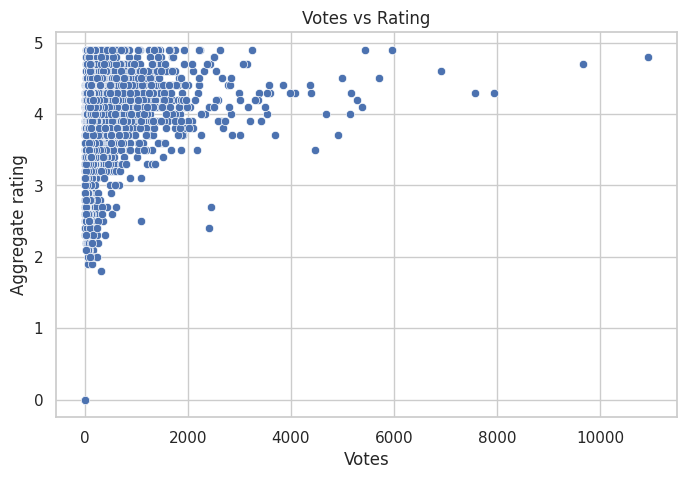

,Votes,Aggregate rating
Votes,1.000000,0.313691
Aggregate rating,0.313691,1.000000


In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title("Votes vs Rating")
plt.show()

df[['Votes','Aggregate rating']].corr()

 TASK 3
 Price Range vs Online Delivery & Table Booking

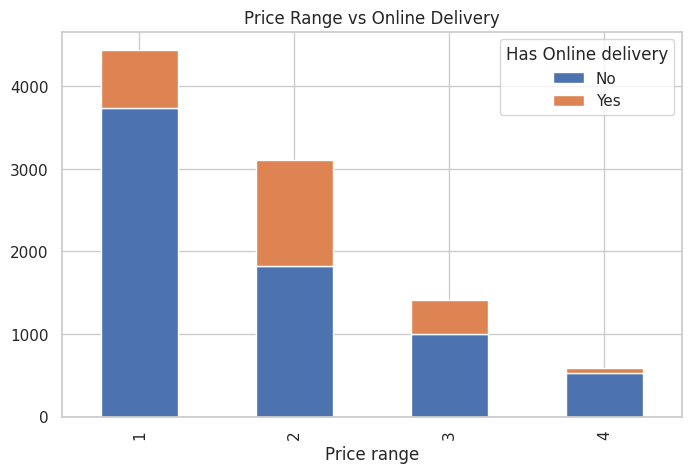

In [27]:
delivery_price = pd.crosstab(df['Price range'], df['Has Online delivery'])

delivery_price.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Price Range vs Online Delivery")
plt.show()

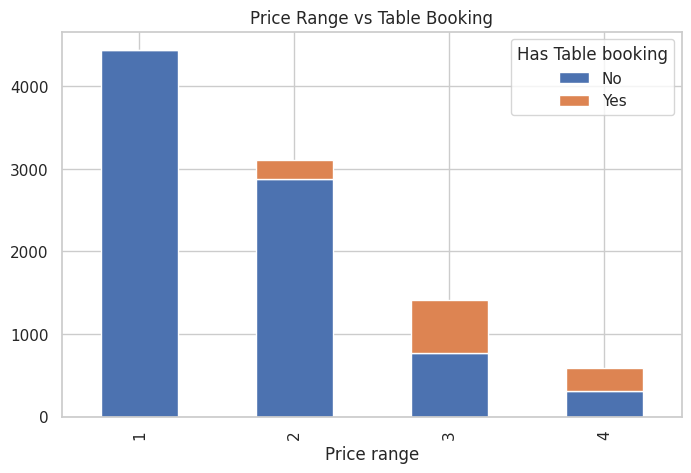

In [29]:
booking_price = pd.crosstab(df['Price range'], df['Has Table booking'])

booking_price.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Price Range vs Table Booking")
plt.show()

In [31]:
df.groupby('Price range')[['Has Online delivery','Has Table booking']].value_counts()

Price range  Has Online delivery  Has Table booking
1            No                   No                   3743
             Yes                  No                    700
                                  Yes                     1
2            No                   No                   1711
             Yes                  No                   1163
                                  Yes                   123
             No                   Yes                   116
3            No                   No                    624
                                  Yes                   373
             Yes                  Yes                   271
                                  No                    140
4            No                   No                    299
                                  Yes                   234
             Yes                  Yes                    40
                                  No                     13
Name: count, dtype: int64